# STAT207 Mini-Project #1 - Neel Roy


Neel Roy

**Delete this code block before submitting**

You should delete and add cells as you see fit.

Don't forget to put written text in **markdown** cells. To change a cell from a <u>code block</u> to a <u>markdown cell</u>:
* Click on the cell you'd like to modify.
* Go to 'Cell' at the top of the page.
* Go to 'Cell Type' in the drop down menu and click on either 'Code' or 'Markdown'.


In [157]:
#Imports here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Introduction

How does the relationship between months and the number of delays caused by weather change for different airports (SFO & ORD)?

Every year millions of flights are delayed due to weather conditions. In this mini-project, I want to explore how the relationship between months and the number of delays caused by weather changes for two different airports, SFO and ORD. I am from the SF Bay Area and fly from SFO to ORD to go to UIUC for college. The reason I want to explore this is because I want to gain a better insight into what periods of the year that have severe weather affect SFO and ORD so that way I can plan ahead better for weather delays.  I believe both airports and airline companies would find the results from this mini-project useful because airports can use this information to be prepared before severe weather hits and airline companies can use this information to strategically plan their flight schedules so that there are minimal flight cancellations and delays leading to more profits. 

## 2. Dataset Discussion

In [158]:
df = pd.read_csv("airlines.csv")
airports = ['SFO', 'ORD']
df = df[df['Airport.Code'].isin(airports)]
df.head(5)

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
20,ORD,"Chicago, IL: Chicago O'Hare International",2003/06,6,June,2003,801,982,2947,11,...,4899,38,24997,30195,54296,55855,135851,604,257007,10401
26,SFO,"San Francisco, CA: San Francisco International",2003/06,6,June,2003,416,312,1080,14,...,1880,9,8211,10183,22673,17879,45407,1138,90487,3390
49,ORD,"Chicago, IL: Chicago O'Hare International",2003/07,7,July,2003,961,1728,4305,8,...,7259,135,22693,31345,75266,137519,314331,201,551568,24251
55,SFO,"San Francisco, CA: San Francisco International",2003/07,7,July,2003,473,365,539,10,...,1464,8,9192,10743,24613,24504,23592,261,79460,6490
78,ORD,"Chicago, IL: Chicago O'Hare International",2003/08,8,August,2003,1017,1512,3461,12,...,6236,138,23806,31121,77366,109807,237540,430,447656,22513


In [159]:
df.shape

(304, 24)

There are 304 rows of data before any data cleaning.

I got this dataset from the corgis-edu github link which can be found here: https://corgis-edu.github.io/corgis/csv/
I downloaded this file on February 16, 2024.

Each row in this dataset represents an airport followed by the time period the data was collected, the airline the data was collected on, and a number of statistics such as flight cancellations, flight delays, and flights on time. The dataset does not describe how the data was collected. The data leaves out numerical variables for flight cancellations such as flight cancellations caused by weather or flight cancellations caused by security, but since we are not exploring flight cancellations, this absence of data does not affect or change our original research motivation on flight delays caused by weather. I intend to explore three variables in this dataset. One variable is called Time.Month which is formatted as a number that corresponds to the month in the year; for example 1 = January, 2 = February, etc. Note that although Month is collected as integer values the real meaning behind those integer values which are months are categorical values. Another variable is called Statistics.# of Delays.Weather which represents the number of delays caused by significant weather conditions whether it be actual or forecasted weather conditions. The final varibale is called Airport.Code which represents the code of a specfic airport; for example: DCA = Washington, DC: Ronald Reagan Washington National.

## 3. Dataset Cleaning

Here I will check for explicit missing values

In [160]:
#Check for null and NaN values
df.isnull()
df.isna()
#Drop NaN values
df = df.dropna()
df.shape

(304, 24)

No explicit missing values were found and therefore no rows were dropped.

Next we will check for implicit missing values.

No, implicit missing values were found in the dataset. One column called Statistics.Minutes.Delayed.Security had the value 0 in multiple rows but this was not deemd an implicit missing value because delays caused by security are rare events. 

In our data cleaning, no implicit or explicit missing values were found and therefore, no rows were dropped. In my evaluation of the data cleaning technique I just used, the pros were that we can be sure that no null or nan values were found. The only con from this technique for the implicit values especially is that I am assuming the the 0 values are not implicit values based on educated inferences. I cannot be sure if this is not an implicit value definitely because no information about those values were given from the site with the dataset. 

Below I will conduct the sample size cleaning. 

In [161]:
categorical_variable = [ 'Airport.Code', 'Time.Month']

# Group data 
grouped = df.groupby(categorical_variable)

# Count the number of observations in each group
group_counts = grouped.size()

# Filter out groups that have less than 10 observations
groups_to_drop = group_counts[group_counts < 10].index

# Drop rows corresponding to these groups from the original DataFrame
filtered_df = df[~df.set_index(categorical_variable).index.isin(groups_to_drop)]
filtered_df

,Airport.Code,Airport.Name,Time.Label,Time.Month,Time.Month Name,Time.Year,Statistics.# of Delays.Carrier,Statistics.# of Delays.Late Aircraft,Statistics.# of Delays.National Aviation System,Statistics.# of Delays.Security,...,Statistics.Flights.Delayed,Statistics.Flights.Diverted,Statistics.Flights.On Time,Statistics.Flights.Total,Statistics.Minutes Delayed.Carrier,Statistics.Minutes Delayed.Late Aircraft,Statistics.Minutes Delayed.National Aviation System,Statistics.Minutes Delayed.Security,Statistics.Minutes Delayed.Total,Statistics.Minutes Delayed.Weather
20,ORD,"Chicago, IL: Chicago O'Hare International",2003/06,6,June,2003,801,982,2947,11,...,4899,38,24997,30195,54296,55855,135851,604,257007,10401
26,SFO,"San Francisco, CA: San Francisco International",2003/06,6,June,2003,416,312,1080,14,...,1880,9,8211,10183,22673,17879,45407,1138,90487,3390
49,ORD,"Chicago, IL: Chicago O'Hare International",2003/07,7,July,2003,961,1728,4305,8,...,7259,135,22693,31345,75266,137519,314331,201,551568,24251
55,SFO,"San Francisco, CA: San Francisco International",2003/07,7,July,2003,473,365,539,10,...,1464,8,9192,10743,24613,24504,23592,261,79460,6490
78,ORD,"Chicago, IL: Chicago O'Hare International",2003/08,8,August,2003,1017,1512,3461,12,...,6236,138,23806,31121,77366,109807,237540,430,447656,22513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4347,SFO,"San Francisco, CA: San Francisco International",2015/11,11,November,2015,585,766,772,3,...,2189,17,11233,13527,39934,51704,31587,165,128015,4625
4370,ORD,"Chicago, IL: Chicago O'Hare International",2015/12,12,December,2015,923,1755,1364,11,...,4233,67,20349,25568,80962,132055,72045,435,307956,22459
4376,SFO,"San Francisco, CA: San Francisco International",2015/12,12,December,2015,757,1180,2372,9,...,4465,37,8949,13833,55283,96703,193525,285,359584,13788
4399,ORD,"Chicago, IL: Chicago O'Hare International",2016/01,1,January,2016,749,993,1228,2,...,3059,14,15141,18605,57731,68443,53301,277,186921,7169


No rows were dropped because 10+ observations were found.


Next, I will perform outlier cleaning.

<Axes: xlabel='Time.Month', ylabel='Statistics.# of Delays.Weather'>

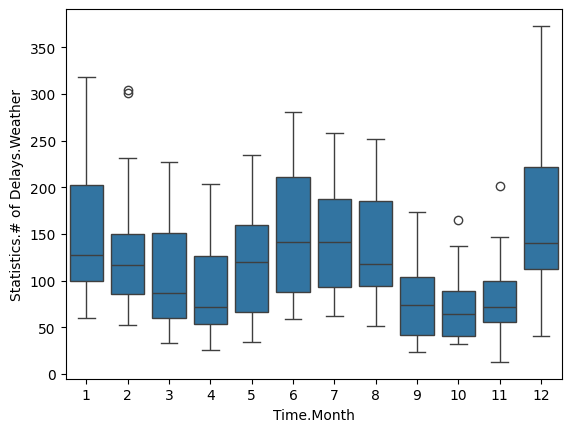

In [175]:
#Create boxplot based on month and number of delays caused by weather
sns.boxplot(x ='Time.Month', y = 'Statistics.# of Delays.Weather', data = df)

Outliers are detected in our numerical variable. The pros of dropping these outliers would be reduced noise or reduced errors that could have been picked up during the data collection process and simplified interpretation which make it less challenging to draw accurate conclusions from the data. The cons of dropping these outliers would be a loss of information which could contain data on especially extreme weather events, biased data in our dataset, and overall misinterpetation of the data. 

I decided to drop the outliers because we do not know how the data was collected and in this way, we can eliminate any outliers caused by data collection errors that we don't know about. 

In [163]:
#Summary statistics
df['Statistics.# of Delays.Weather'].describe()


count    304.000000
mean     118.779605
std       67.514678
min       13.000000
25%       66.000000
50%      103.500000
75%      157.000000
max      373.000000
Name: Statistics.# of Delays.Weather, dtype: float64

I will determine the Q3 and Q1 and then, I will determine the IQR and use that to determine the range of values I should keep.

In [164]:
#Determine Q3 and Q1
Q3 = df["Statistics.# of Delays.Weather"].quantile(0.75)
Q1 = df["Statistics.# of Delays.Weather"].quantile(0.25)

#Get IQR with Q3 and Q1
IQR = Q3 - Q1

#Determine range of ourliers to drop
lower_outliers = Q1 - (1.5 * IQR)
upper_outliers = Q3 + (1.5 * IQR)
print(lower_outliers, upper_outliers)


-70.5 293.5


I will drop any values lower than lower_outliers and higher than upper_outliers to drop our outliers. 

<Axes: xlabel='Time.Month', ylabel='Statistics.# of Delays.Weather'>

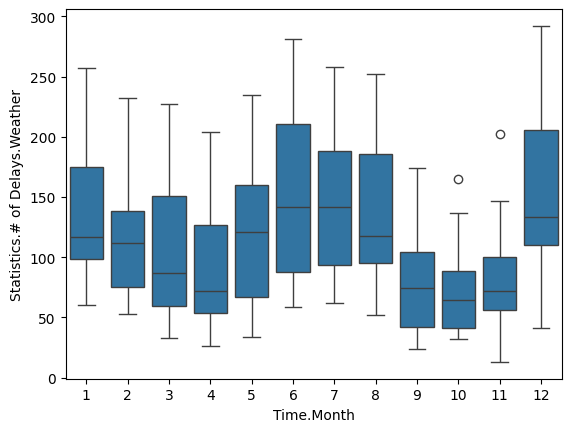

In [176]:
#Create new dataframe with dropped outliers
df2 = df[(df['Statistics.# of Delays.Weather'] > lower_outliers) & (df['Statistics.# of Delays.Weather'] < upper_outliers)]

#Boxplot again to visualize data better
sns.boxplot(x ='Time.Month', y = 'Statistics.# of Delays.Weather', data = df2)

In [166]:
df2.shape

(298, 24)

The number of rows decreased from 304 to 298 which means we dropped 6 rows. After the outliers were dropped, the boxplot is now easier to read.

array([[<Axes: title={'center': 'Statistics.# of Delays.Weather'}>]],
      dtype=object)

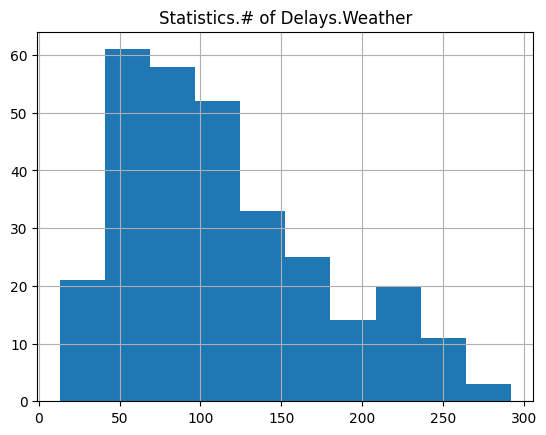

In [167]:
df2.hist('Statistics.# of Delays.Weather')

When trying to answer my research question(How does the relationship between months and the number of delays caused by weather change for different airports?), I decided to check for the modality of my data and saw that the data was skewed right but I decided not do alter anything about this data because this is potentially how the data is supposed to be, so therefore I did not come across any other data cleaning technqies that could make the data more clear. I decided not to pursue any other additional data cleaning. 

## 4. <u>Research Question</u>: How does the Relationship between Months and number of delays caused by weather change based on different airports (SFO & ORD) in the Dataset?

How does the relationship between months and the number of delays caused by weather change for different airports (SFO & ORD)?

I will create a box plot and violin plot to visualize the differences in shape, measure of center, measure of spread, and outliers.

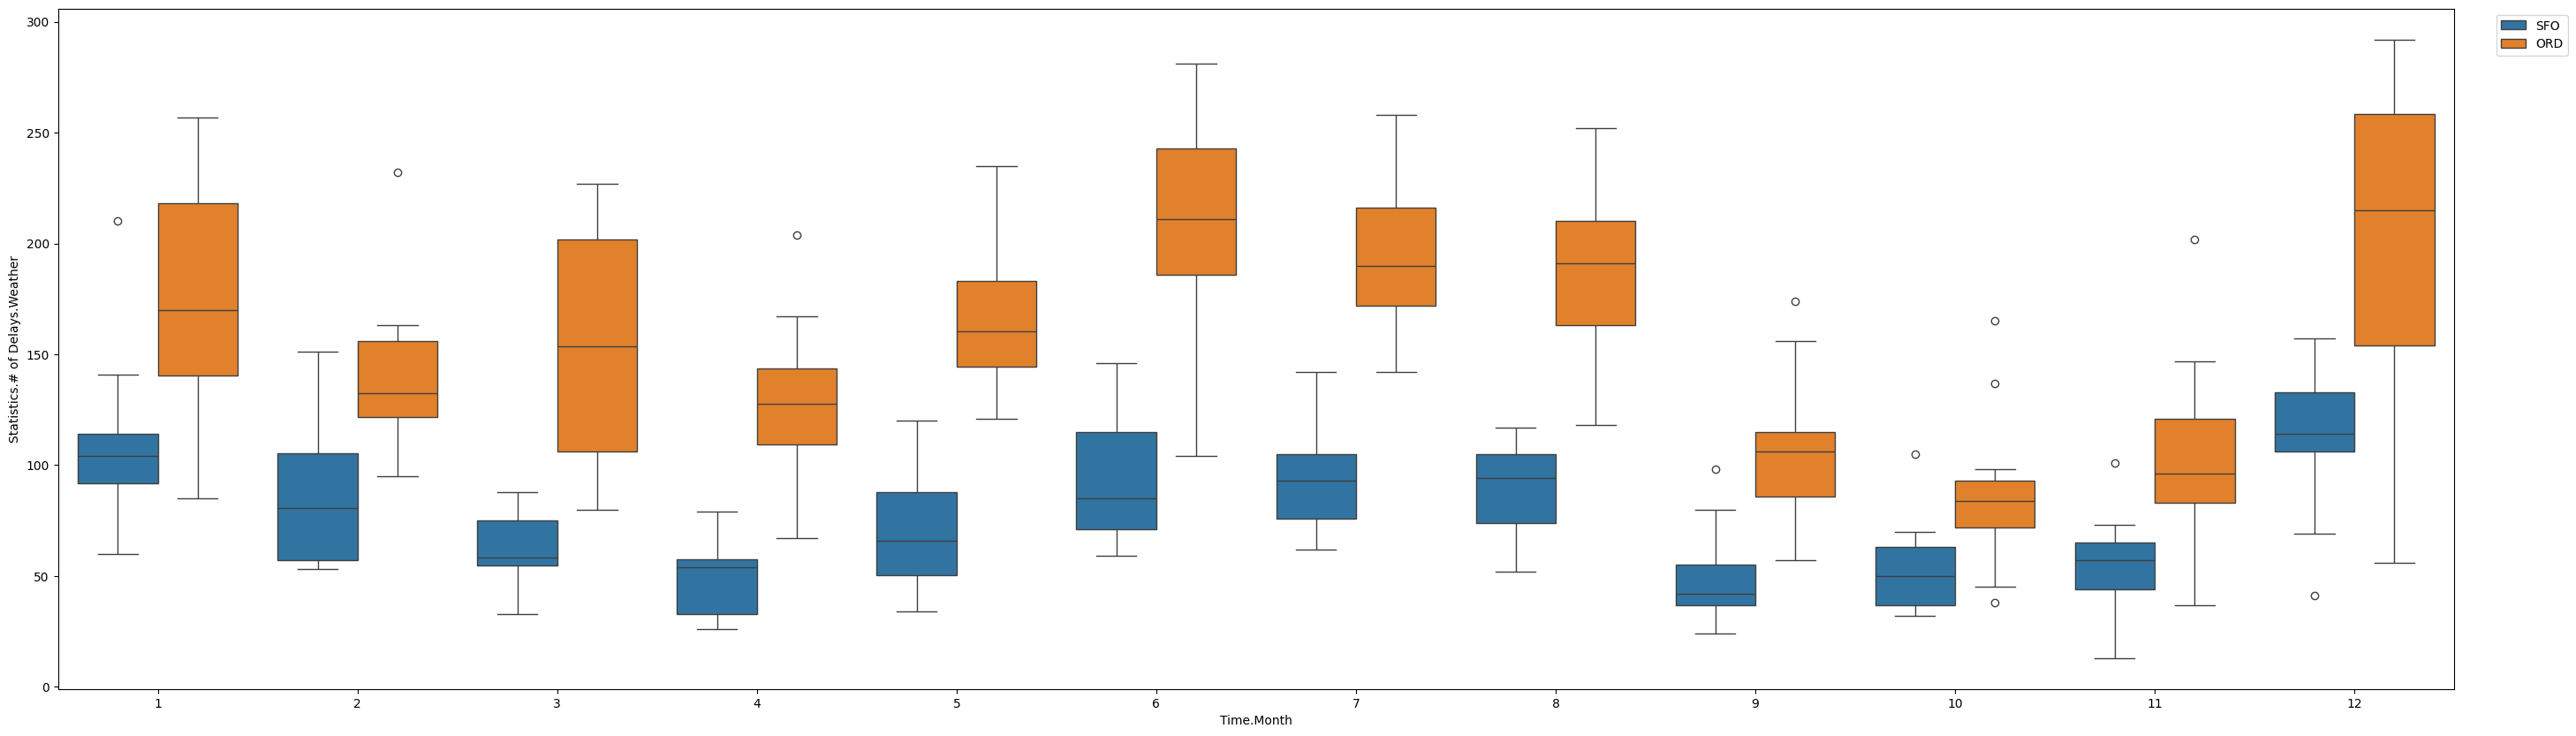

In [172]:

plt.figure(figsize = (35, 10))
sns.boxplot(x ='Time.Month', y= 'Statistics.# of Delays.Weather', hue = 'Airport.Code', data = df2)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.show()


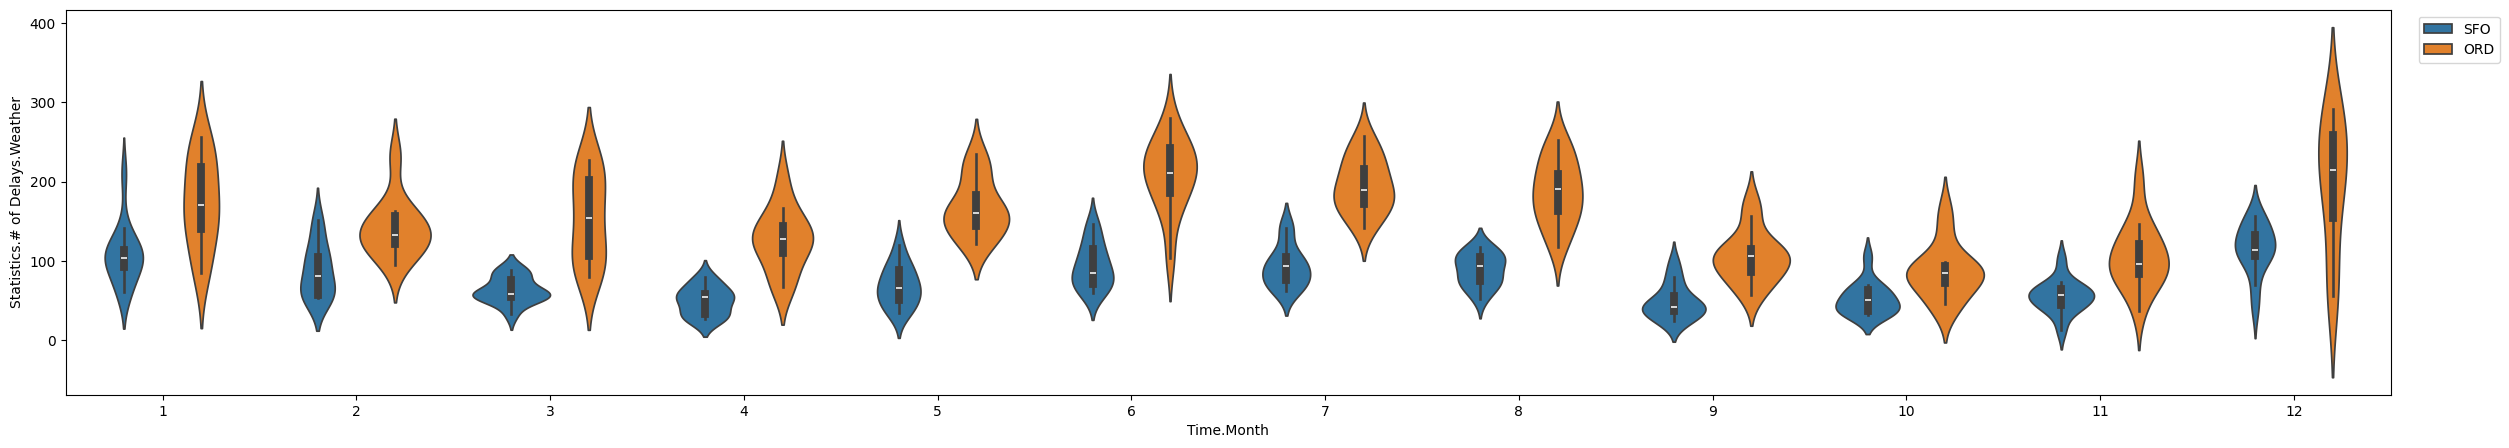

In [170]:
plt.figure(figsize=(30, 5))
sns.violinplot(x = 'Time.Month', y = 'Statistics.# of Delays.Weather', hue = 'Airport.Code', data = df2)
plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
plt.show()

1. Shape Differences Change

Most distributions are unimodal but there are multimidal distribution such as the violin plots for month 3. There is a mix of left and right skew among the plots such as in the violin plots, month 12 shows left skew while month 2 shows right skew. The airport location does change the shape disparities of the distributions.

2. Appropriate Measure of Center Differences Change

The general median number of weather delays for SFO is less than the median number of weather delays for ORD among all the months.

3. Appropriate Measure of Spread Differences Change

The Interquartile Range for weather delays for SFO airport is less than the Interquartile Range for weather delays for ORD airport among all the months.

4. Outlier Differences Change

Although we dropped extreme outliers earlier, there are a few minor outliers present in the box plot created. Something to note is that months 9-11 contain the most outliers for both airports. Despite these outliers, the outliers do not seem to be greatly influencing the skew of the plots. 

How does the relationship between months and the number of delays caused by weather change for different airports (SFO & ORD)?

We saw a general trend in weather delays for each month of the year. Weather delays rise during the summer and winter months of the year and weather delays decrease during the spring and fall months of the year. When we took our z variable, in this case, the different airports,  we saw this same general trend happen among both the airports but what was interesting was SFO had significantly less weather delays than ORD. So when we take our z variable into account, this changes the relationship between the months of the year and the number of weather delays because when we factored in the different airports, we factored in the different weather conditions present at the different regions the two airports were located in. 

## 5. Conclusion

How does the relationship between months and the number of delays caused by weather change for different airports (SFO & ORD)?

In summary, when the relationship of each month and the number of weather delays is compared, a general down trend of weather delays in the months of February through April and September through November is seen. A general uptrend in weather delays is seen in the months of December through January and May through August. Adding in the SFO and ORD airports, the relationship between each month and the number of weather delays effectively changes because it is seen that overall, the weather delays per month are higher for the ORD airport than for the SFO airport. This interesting statistical insight tells us that the relationship between each month and the number of weather delays is also dependent on the location of the weather delays.

One caveat to consider though is the presence of confounding variables. Although general uptrends of weather delays are seen in the summer and winter months and downtrends of weather delays are seen in the spring and fall months, it's important to also consider the fact that more air travel occurs during the summer and winter months and the less travel occurs during the spring and fall months which affects the number of flights happening during those months. Because more flights are happening during the summer and winter months, more delays caused by weather would be recorded. Because less flights are happening during the spring and fall months, less delays caused by weather would be recorded. So there is a difference in sample size per month present in our findings as well. Another shortcoming is the amount of flights that happen at each airport. ORD is by far, a busier airport than SFO and because of that, more flights are happening at ORD than SFO. In the research, it was seen that SFO had less weather delays than ORD, but this could also be due to the fact that more weather delays were recorded at ORD than SFO just because of the difference in the sheer volume of flights happening. These shortcomings could affect how the people in our research motivation might use the answer to our research question. Instead of better preparing for weather delays, these people would look into better preparing for general uptrends and downtrends in air travel at ORD and SFO. 

Based on what I observed in my analysis, one idea I have for future work is to conduct similar analysis on confounding variables and cross referencing the research to see if the variables I found were truly confounding or not. For example, researching the amount of air travel in certain months and certain airports can help us determine if the relationship between each month and the number of weather delays truly changes because of the different airports. This could further support the findings I make from my research and help people in our research motivation solve the problems they have. 